In [1]:
import datetime
import operator

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['figure.figsize'] = [16., 9.]

In [3]:
dtypes_dict = {"M"+str(key):np.float32 for key in range(1,9)}
dtypes_dict["DaysToExp"] = np.int32
dataframe = pd.read_csv("data/VIX Futures min.csv", usecols=[0] + list(range(2,10)) + [11],
                        index_col=0, dtype=dtypes_dict, parse_dates=[0])

In [4]:
dataframe = dataframe.loc["2006-10-25 12:19:00":"2017-06-16"]

In [5]:
cond = (dataframe.index + datetime.timedelta(days=1)).isin(dataframe.index)
useful_indices = dataframe.index.where(cond).dropna()
this_term = dataframe.loc[useful_indices,"M1":"M8"]
next_term = dataframe.loc[useful_indices + datetime.timedelta(days=1),"M1":"M8"]

In [6]:
assert this_term.dropna(how="all").shape == this_term.shape
assert next_term.dropna(how="all").shape == next_term.shape
assert this_term.shape == next_term.shape

In [7]:
this_term

,M1,M2,M3,M4,M5,M6,M7,M8
time,,,,,,,,
2006-10-25 12:19:00,11.620,12.660,13.810,14.560,15.160,15.410,15.680,NaN
2006-10-25 12:20:00,11.690,12.660,13.810,14.560,15.160,15.410,15.680,NaN
2006-10-25 12:21:00,11.690,12.660,13.810,14.560,15.160,15.410,15.680,NaN
2006-10-25 12:22:00,11.690,12.660,13.810,14.560,15.160,15.410,15.680,NaN
2006-10-25 12:23:00,11.690,12.660,13.810,14.560,15.160,15.410,15.680,NaN
2006-10-25 12:24:00,11.690,12.660,13.810,14.560,15.160,15.410,15.680,NaN
2006-10-25 12:25:00,11.690,12.660,13.810,14.560,15.160,15.410,15.680,NaN
2006-10-25 12:26:00,11.690,12.660,13.810,14.560,15.160,15.410,15.680,NaN
2006-10-25 12:27:00,11.690,12.660,13.810,14.560,15.160,15.410,15.680,NaN


In [8]:
next_term

,M1,M2,M3,M4,M5,M6,M7,M8
time,,,,,,,,
2006-10-26 12:19:00,11.390,12.350,13.620,14.340,14.920,15.430,15.520,NaN
2006-10-26 12:20:00,11.390,12.350,13.620,14.340,14.920,15.430,15.520,NaN
2006-10-26 12:21:00,11.390,12.350,13.620,14.340,14.920,15.430,15.520,NaN
2006-10-26 12:22:00,11.390,12.350,13.620,14.340,14.920,15.430,15.520,NaN
2006-10-26 12:23:00,11.390,12.350,13.620,14.340,14.920,15.430,15.520,NaN
2006-10-26 12:24:00,11.390,12.350,13.620,14.340,14.920,15.430,15.520,NaN
2006-10-26 12:25:00,11.390,12.350,13.620,14.340,14.920,15.430,15.520,NaN
2006-10-26 12:26:00,11.390,12.350,13.620,14.340,14.920,15.430,15.520,NaN
2006-10-26 12:27:00,11.390,12.350,13.620,14.340,14.920,15.430,15.520,NaN


In [9]:
np.nanmean(np.square(next_term.values - this_term.values))

0.52838415

In [11]:
this_final = this_term.diff(axis=1).iloc[:,1:].join(this_term.iloc[:,0]).iloc[:,range(-1,7)]
this_final = this_final.join(dataframe["DaysToExp"])

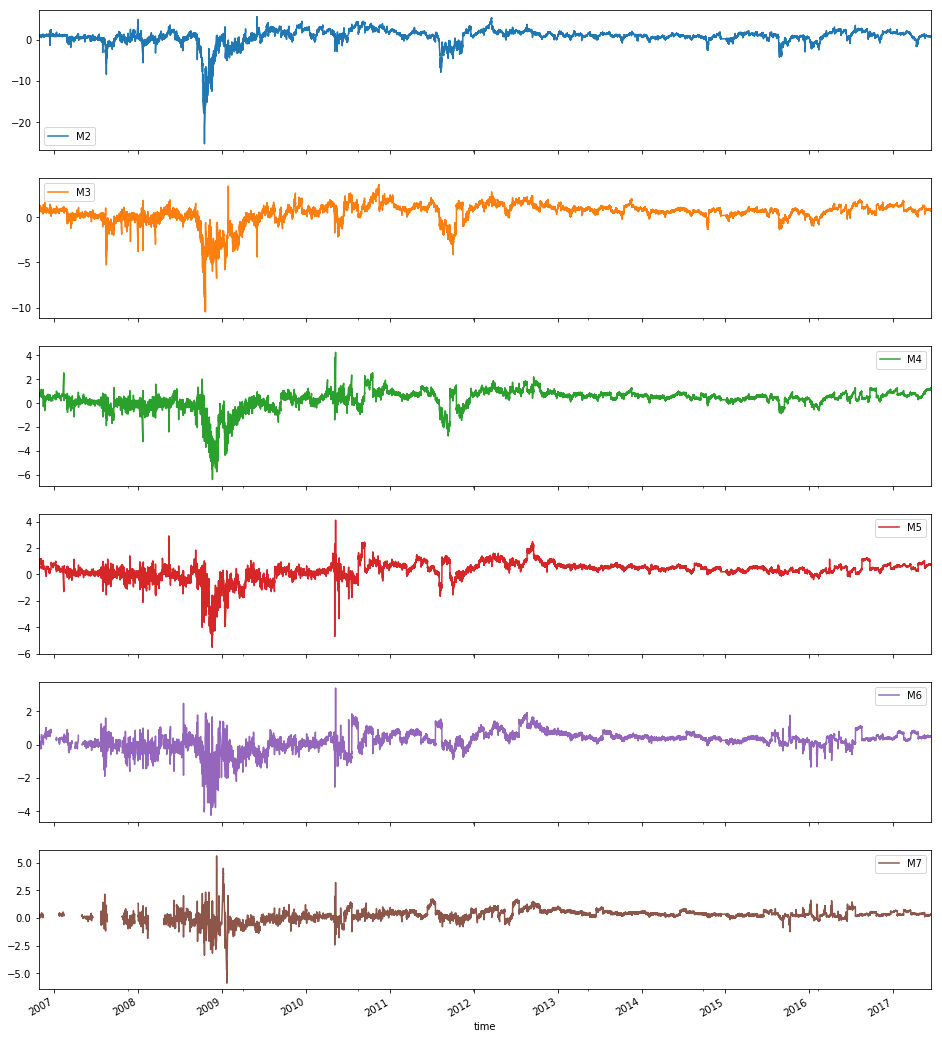

In [16]:
this_final.loc[:,"M2":"M7"].plot(figsize=(16,20), subplots=True)
plt.show()

In [19]:
def calculate_long_prices(term: pd.Series):
        longs = [2*term[i] - term[i-1] - term[i+1] for i in range(1, len(term)-1)]
        return pd.Series(longs, term[1:-1].index)
next_final = next_term.apply(calculate_long_prices, axis=1)

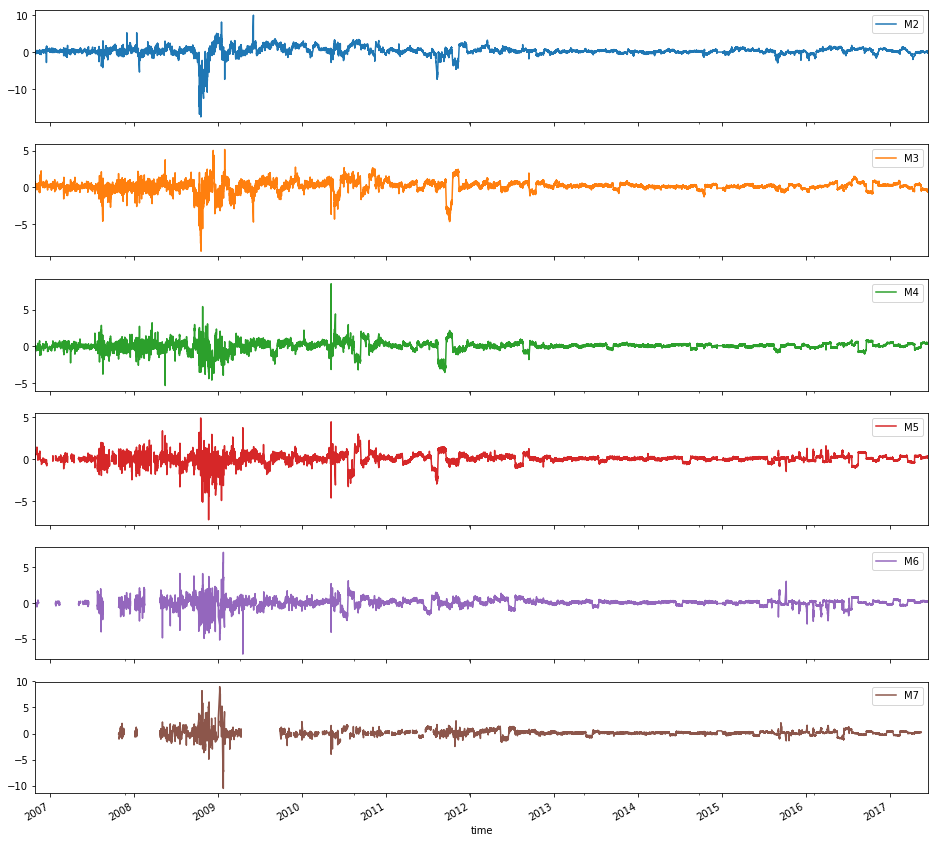

In [25]:
next_final.plot(figsize=(16,16), subplots=True)
plt.show()

In [28]:
# this_final.to_hdf("term_structure_minutely.hdf5", "x", complevel=9, complib="bzip2")
# next_final.to_hdf("term_structure_minutely.hdf5", "y", complevel=9, complib="bzip2")